# Example to load and plot spectrum (json)

In [4]:
import s3fs
import json
import pandas as pd

from widetrax import Spectra as sp
import matplotlib.pyplot as plt
import numpy as np


In [5]:
# Setup the S3 filesystem
fs = s3fs.S3FileSystem(anon=True,endpoint_url="https://minio.dive.edito.eu")


In [6]:

model=["GLO12V4","GLO36V1","NOC-eORCA025","NOC-eORCA12", "HYCOM50-E026SURF", "HYCOM50-E037SURF"]
name_season="JFM"
nom_region="Region_A"

spectrum=[]
freq=[]
for imodel in range(len(model)):
    # json_file = str(nom_region)+"_"+str(name_season)+"_"+str(model[imodel])+".json"
    json_file = "project-meom-ige/OMIP/"+ str(nom_region)+"_"+str(name_season)+"_"+str(model[imodel])+".json"
    # Step 1: Open the JSON file
    with fs.open(json_file, "r") as file:
        datamodel = json.load(file)  # Parse JSON into a Python dictionary
    spectrum.append(datamodel["Spectra"]) 
    freq.append(datamodel["Frequency"])




/work/scratch/env/aguedjh/ceswot-custom/lib/python3.10/site-packages/widetrax/Spectra.py:239: RuntimeWarning: divide by zero encountered in divide
  ax2 = ax.secondary_xaxis("bottom", functions=(lambda x: 1 / x, lambda x: 1 / x))


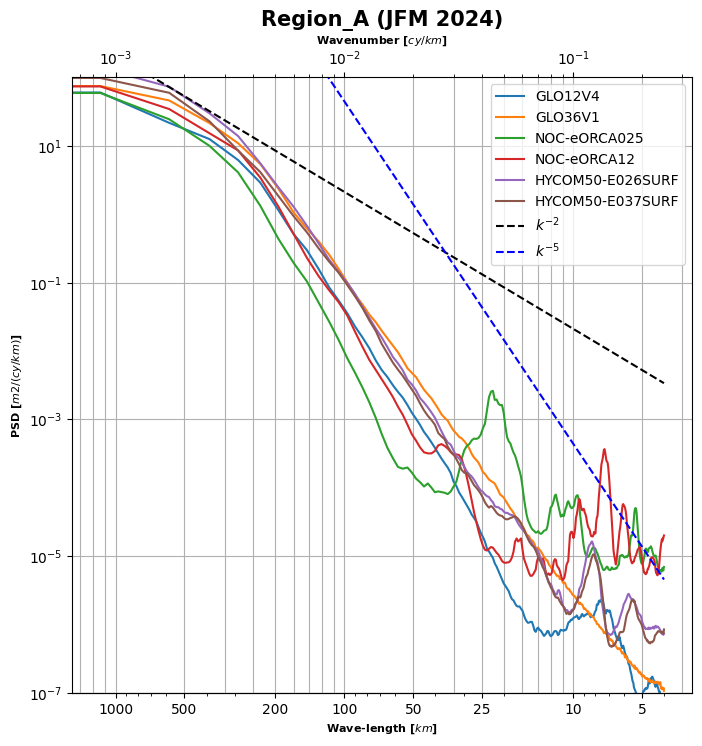

In [7]:

fig, ax_ = plt.subplots(1, 1, figsize=(8, 8))
sp.plot_psd(ax_, np.array(freq[0]).T, psds = [spectrum[0],spectrum[1],spectrum[2],spectrum[3] ,spectrum[4] ,spectrum[5]], unit = "m2",psd_labels=model,title=(nom_region+" ("+name_season+" 2024)"),savefig=True,plot_transparent=False)

